In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.arff


In [2]:
! pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.0 MB/s eta 0:00:00


# Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import OrderedDict
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.facecolor']='#CDE2E5'

colors = ["#49C3CB", "#7D49CB", "#FFC156", "#365C89", 
             "#E9937E", "#9EE97E", "#F384BC"]

In [4]:
df = pd.read_excel('/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

# Data Analysis and Visualizations

In [5]:
df.head(2).style.set_properties(**{'background-color': '#EED4CF',
                           'color': 'black'})

In [6]:
df.shape

(898, 35)

In [7]:
df.isnull().sum().to_frame()

0
AREA           0
PERIMETER      0
MAJOR_AXIS     0
MINOR_AXIS     0
ECCENTRICITY   0
EQDIASQ        0
SOLIDITY       0
CONVEX_AREA    0
EXTENT         0
ASPECT_RATIO   0
ROUNDNESS      0
COMPACTNESS    0
SHAPEFACTOR_1  0
SHAPEFACTOR_2  0
SHAPEFACTOR_3  0
SHAPEFACTOR_4  0
MeanRR         0
MeanRG         0
MeanRB         0
StdDevRR       0
StdDevRG       0
StdDevRB       0
SkewRR         0
SkewRG         0
SkewRB         0
KurtosisRR     0
KurtosisRG     0
KurtosisRB     0
EntropyRR      0
EntropyRG      0
EntropyRB      0
ALLdaub4RR     0
ALLdaub4RG     0
ALLdaub4RB     0
Class          0

In [8]:
df.describe().style.set_properties(**{'background-color': '#EED4CF',
                           'color': 'black'})

Text(0.5, 1.0, 'Distribution of \nDate Fruits')

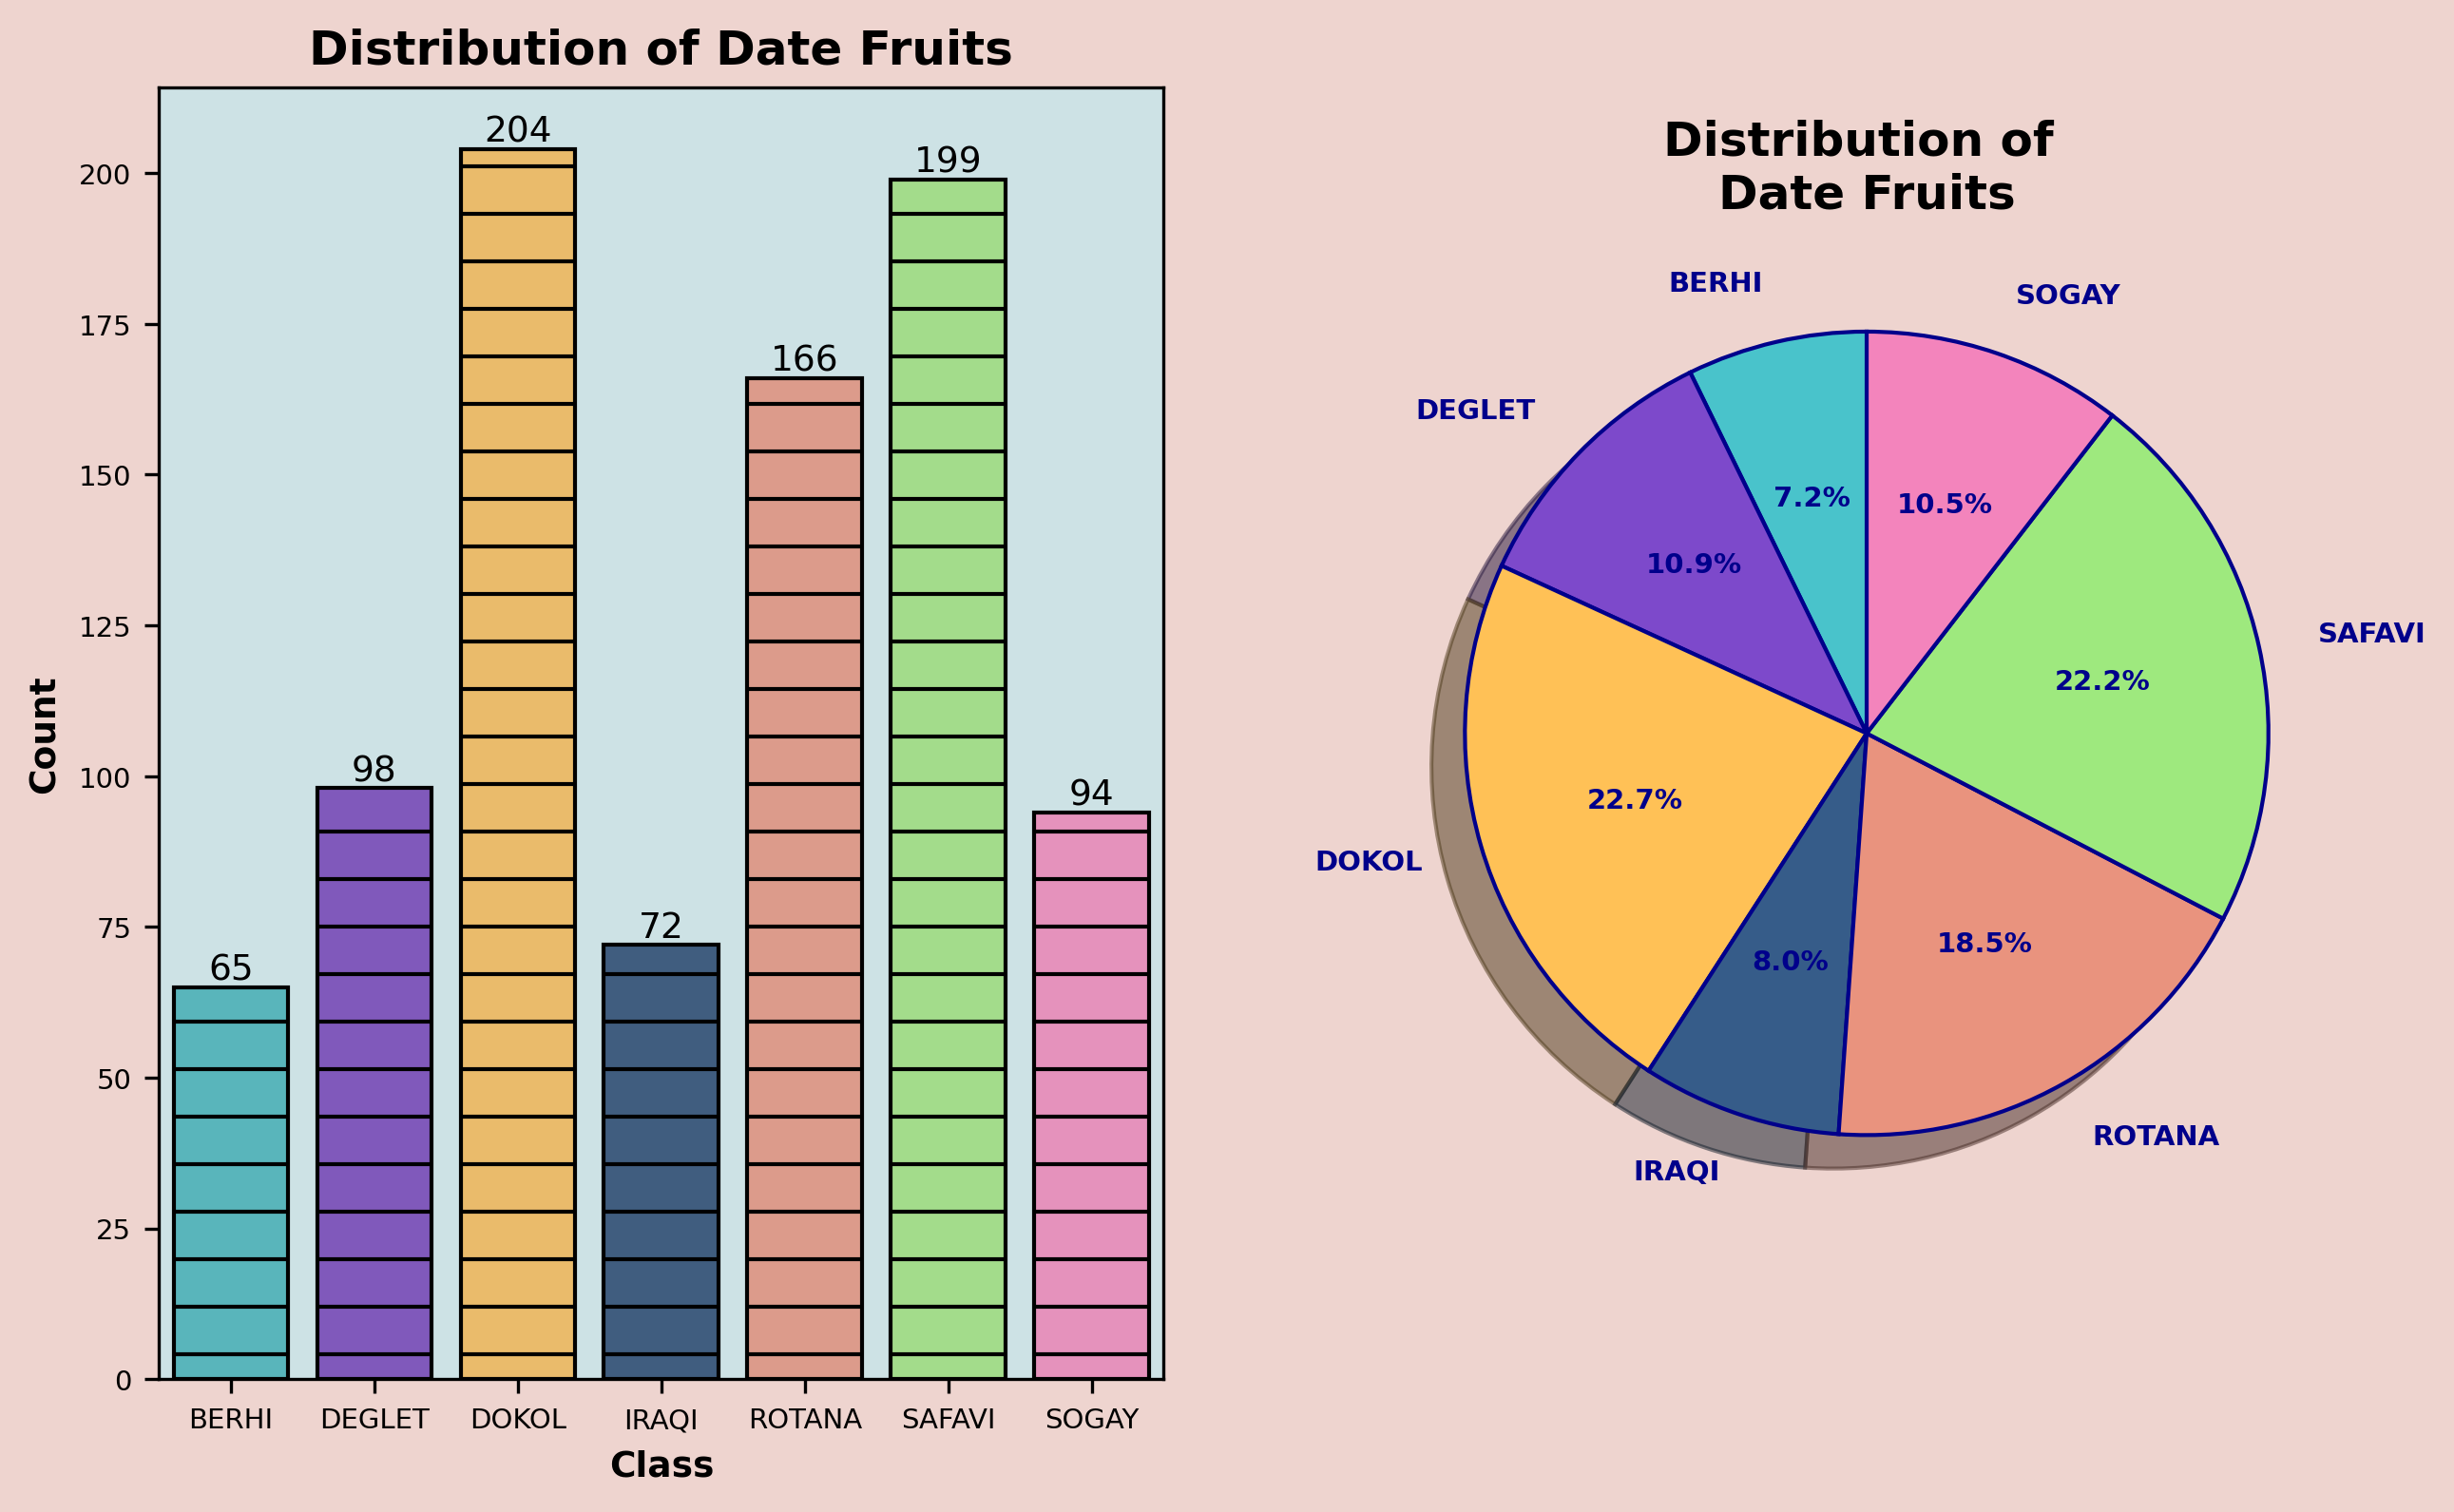

In [9]:
type_dict = df["Class"].value_counts().to_dict()
type_dict = OrderedDict(sorted(type_dict.items()))
type_label = type_dict.keys()
type_value = type_dict.values()
explode = (0,)*df["Class"].nunique()

fig, ax = plt.subplots(1,2, facecolor='#EED4CF')
sns.countplot(data=df, x="Class", palette=colors, edgecolor="black", hatch="-", ax=ax[0])
ax[0].set_title("Distribution of Date Fruits", size=12, fontweight="bold")
ax[0].set_xlabel("Class", size=9, fontweight="bold")
ax[0].set_ylabel("Count", size=9, fontweight="bold")
ax[0].tick_params(axis="x", labelsize=7) 
ax[0].tick_params(axis="y", labelsize=7)
ax[0].bar_label(ax[0].containers[0], fmt='%.0f', color="black", fontsize=9)

plt.pie(type_value, explode=explode, labels=type_label, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 7, "fontweight" : "bold", "color":"darkblue"},  wedgeprops=
       {'edgecolor':'darkblue'} ,colors=colors, labeldistance=1.15)
plt.title("Distribution of \nDate Fruits", size=12, fontweight="bold")

<p style="color:darkblue">Let's choose some features to check the distributions between the classes.</p>
<p style="color:darkblue">The number of figures might be increased for other features as well. In order not to overwhelm readers with too many figures &#128516, I only choose 3 features(Area, Perimeter and Eccentricity).</p>

In [10]:
dis_feat = ["AREA", "PERIMETER", "ECCENTRICITY"]

for i in dis_feat:
    with sns.axes_style("white", rc={"axes.facecolor":"#413D41",'figure.facecolor':'#EED4CF'}):
        sns.displot(data=df, x=i, hue="Class", kind="kde", palette=colors, fill=True, legend=True
                                 ,aspect=2)
        plt.title("Distribution of " + i.capitalize() + " by Class\n(Combined)", size=18, fontweight="bold", color="#413D41")

In [11]:
for i in dis_feat : 
    with sns.axes_style("white", rc={"axes.facecolor": (0, 0, 0, 0), 'figure.facecolor':'beige'}):

        g = sns.FacetGrid(df, row="Class", hue="Class", aspect=15, height=.5, palette=colors)

        g.map(sns.kdeplot, i,
              bw_adjust=.5, clip_on=False,
              fill=True, alpha=1, linewidth=1.5)
        g.map(sns.kdeplot, i, clip_on=False, color="w", lw=2, bw_adjust=.5)

        g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
        def label(x, color, label):
            ax = plt.gca()
            ax.text(0, .2, label, fontweight="bold", color=color,
                    ha="left", va="center", transform=ax.transAxes)

        g.map(label, "Class")
        g.fig.subplots_adjust(hspace=-.25)
        g.set_titles("")
        g.set(yticks=[], xlabel="", ylabel="")
        plt.xlabel(i, fontweight="bold")
        g.despine(bottom=True, left=True)
        plt.title("Distribution of " + i.capitalize() + " by Class\n(Separated)", y=5.5, size=12, fontweight="bold", color="#413D41")

<h2 style="color:crimson"> Outliers</h2>

In [12]:
list_col = list(df.columns)
list_col.remove("Class")

fig = plt.figure(figsize=(20,12), facecolor='#EED4CF')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(list_col):
    ax = fig.add_subplot(5, 7, num +1)
    ax = sns.boxplot(x=df[column_name], color='skyblue')

<p style="color:darkblue;">I will not dive into outliers since I do not have domain knowledge about the date fruits.</p>

<h2 style="color:crimson"> Correlation Matrix</h2>

In [13]:
plt.figure(figsize=(20,20), facecolor='#EED4CF')
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, annot=True, cmap="Reds")
plt.title("Correlations", size=22, fontweight="bold")
plt.tight_layout()

# Data Preprocessing

In [14]:
X = df.drop("Class", axis = 1)
y = df["Class"]

le = LabelEncoder() # encoding
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    stratify=y, random_state=42) # splitting

scaler = StandardScaler() # scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

# Model Building

Text(0.5, 1.0, 'Best k for KNN')

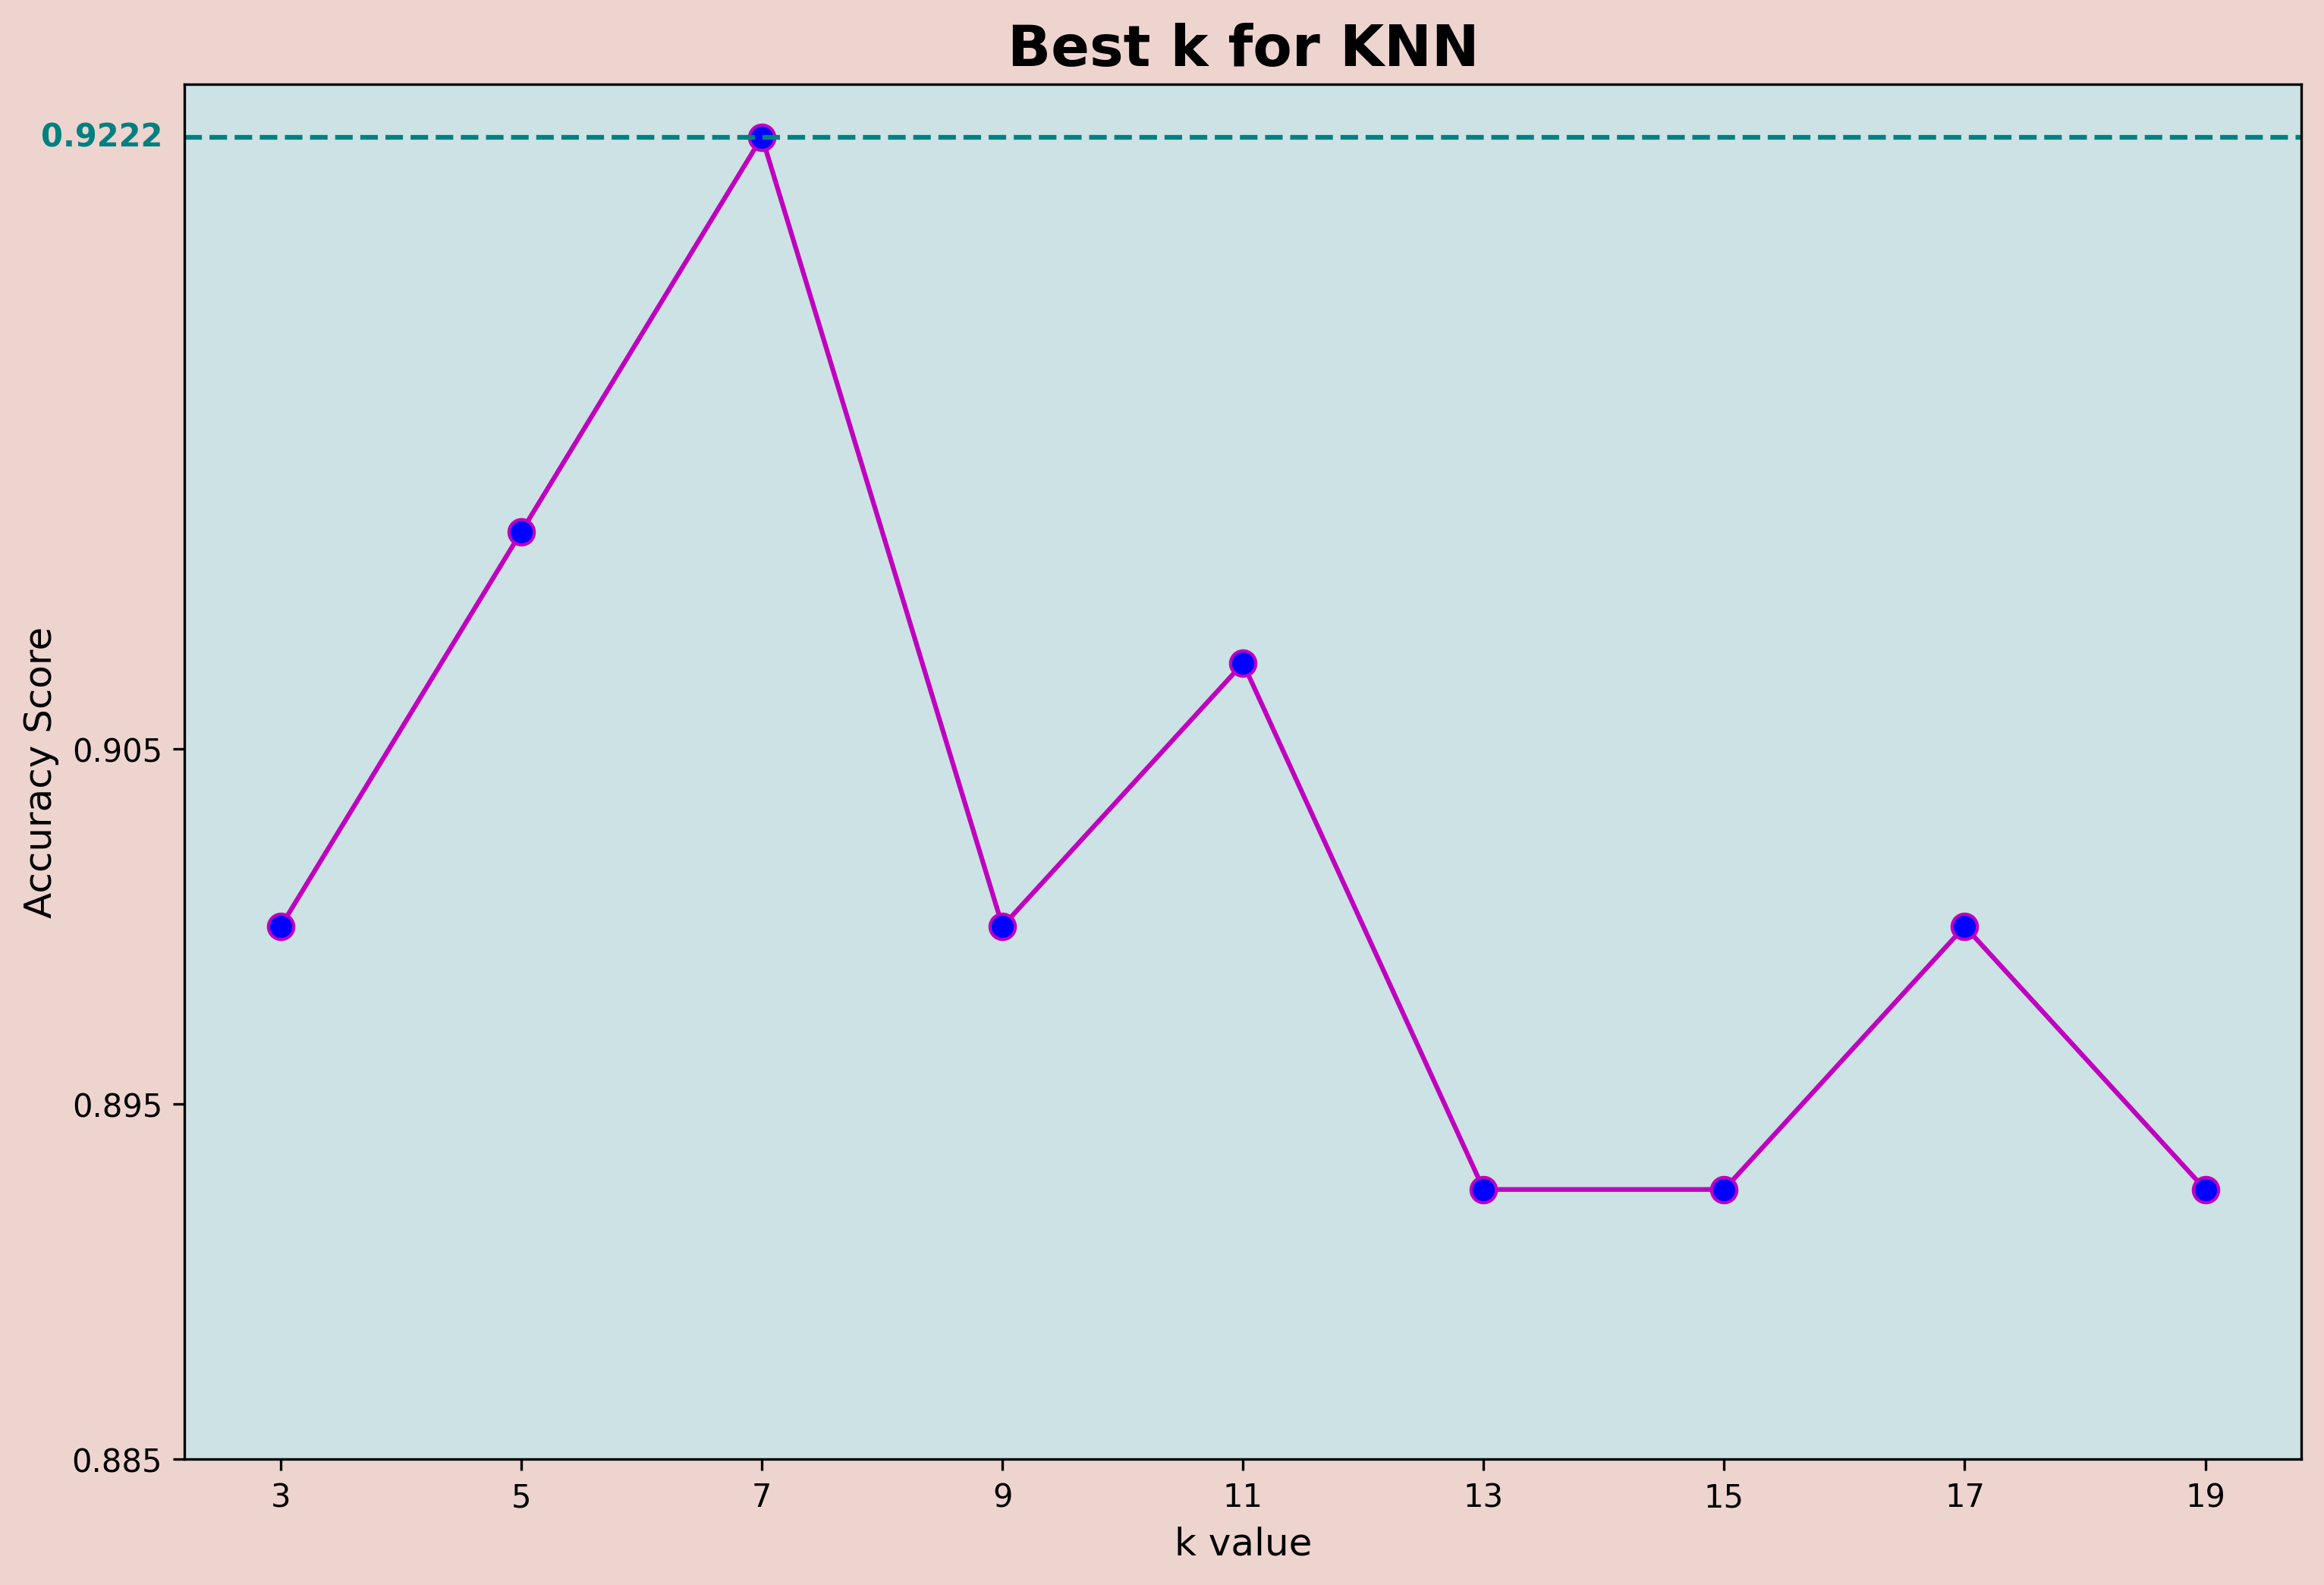

In [15]:
neighbors_list = list(range(3,20,2))
knn_score_list = []

for number in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=number)
    knn.fit(X_train, y_train)
    y_predict_knn = knn.predict(X_test)
    knn_score_list.append(accuracy_score(y_test, y_predict_knn))
    
fig, ax = plt.subplots(1,1, figsize=(12,8), facecolor="#EED4CF")
plt.plot(neighbors_list, knn_score_list, marker="o", markerfacecolor="blue", markersize=8, color="m")
plt.xticks(np.arange(3, 20, 2))
plt.yticks(np.arange(0.885, 0.910, 0.010))
plt.xlabel("k value", size=12)
plt.ylabel("Accuracy Score", size=12)
ax.axhline(y = max(knn_score_list) , linewidth = 1.5, color = "teal", linestyle="dashed")
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, max(knn_score_list), "{:.4f}".format(max(knn_score_list)), color="teal", transform=trans, 
        ha="right", va="center", fontweight="bold")
plt.title("Best k for KNN", size=18, fontweight="bold")

In [16]:
class models:

    def __init__(self, X_train, X_test, y_train, y_test):

        self.score_dict = {}

        self.X_train = X_train 
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        #Logistic Regression
        self.lr = LogisticRegression(C = 0.1)
        self.lr.fit(self.X_train, self.y_train)
        self.y_predict_lr = self.lr.predict(self.X_test)
        #DTC
        self.dtc = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 10, random_state=42)
        self.dtc.fit(self.X_train, self.y_train)
        self.y_predict_dtc = self.dtc.predict(self.X_test)
        #RFC
        self.rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=10)
        self.rfc.fit(self.X_train, self.y_train)
        self.y_predict_rfc = self.rfc.predict(self.X_test)
        #SVM
        self.svm = SVC(probability=True, C = 1, kernel = 'linear')
        self.svm.fit(self.X_train, self.y_train)
        self.y_predict_svm = self.svm.predict(self.X_test)
        #KNN
        self.knn = KNeighborsClassifier(n_neighbors=7)
        self.knn.fit(self.X_train, self.y_train)
        self.y_predict_knn = knn.predict(self.X_test)
        #Naive Bayes
        self.nb = GaussianNB()
        self.nb.fit(self.X_train, self.y_train)
        self.y_predict_nb = self.nb.predict(self.X_test)

    def accuracy_scores(self):

        self.score_dict["LR"] = round(self.lr.score(self.X_test, self.y_test), 3)
        self.score_dict["DTC"] = round(self.dtc.score(self.X_test, self.y_test), 3)
        self.score_dict["RFC"] = round(self.rfc.score(self.X_test, self.y_test), 3)
        self.score_dict["SVM"] = round(self.svm.score(self.X_test, self.y_test), 3)
        self.score_dict["KNN"] = round(self.knn.score(self.X_test, self.y_test), 3)
        self.score_dict["NB"] = round(self.nb.score(self.X_test, self.y_test), 3)

        fig, ax = plt.subplots(2,1, figsize=(12,10), dpi=300, facecolor="#EED4CF")
        acc_scores = [list(self.score_dict.values())]
        collabel = tuple(self.score_dict.keys())
        index_max = list(self.score_dict.values()).index(max(list(self.score_dict.values())))
        ax[0].axis('tight')
        ax[0].axis('off')
        the_table = ax[0].table(cellText=acc_scores, colLabels=collabel, loc='center', cellLoc="center")
        ax[0].set_title("Acc. Comparison Table", y=0.6, color="purple", fontweight="bold")

        for i in range(0, len(list(self.score_dict.keys()))):
            the_table[(0, i)].set_facecolor("#EBCE5A")
        
        the_table[(1, index_max)].set_facecolor("#98DE6F")
        ax[1].plot(list(self.score_dict.keys()), list(self.score_dict.values()), color = "purple", marker="o")
        plt.title("Comparison of Models According to Acc. Scores", color="purple", fontweight="bold")
        plt.xlabel("Model", color="purple")
        plt.ylabel("Acc. Score", color="purple")
        plt.show()


    def con_matrix(self):
        
        cm_lr = confusion_matrix(self.y_test, self.y_predict_lr)
        cm_lr_df = pd.DataFrame(cm_lr, index=le.classes_, columns=le.classes_)
        plt.figure(figsize=(10,6), dpi=300, facecolor="#EED4CF")
        sns.heatmap(cm_lr_df, annot=True, cmap="Oranges", fmt=".1f")
        plt.title("LR Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_dtc = confusion_matrix(self.y_test, self.y_predict_dtc)
        cm_dtc_df = pd.DataFrame(cm_dtc, index=le.classes_, columns=le.classes_)
        plt.figure(figsize=(10,6), dpi=300, facecolor="#EED4CF")
        sns.heatmap(cm_dtc_df, annot=True, cmap="Reds", fmt=".1f")
        plt.title("DTC Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_rfc = confusion_matrix(self.y_test, self.y_predict_rfc)
        cm_rfc_df = pd.DataFrame(cm_rfc, index=le.classes_, columns=le.classes_)
        plt.figure(figsize=(10,6), dpi=300, facecolor="#EED4CF")
        sns.heatmap(cm_rfc_df, annot=True, cmap="Reds",fmt=".1f")
        plt.title("RFC Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_svm = confusion_matrix(self.y_test, self.y_predict_svm)
        cm_svm_df = pd.DataFrame(cm_svm, index=le.classes_, columns=le.classes_)
        plt.figure(figsize=(10,6), dpi=300, facecolor="#EED4CF")
        sns.heatmap(cm_svm_df, annot=True, cmap="Reds",fmt=".1f")
        plt.title("SVM Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_knn = confusion_matrix(self.y_test, self.y_predict_knn)
        cm_knn_df = pd.DataFrame(cm_knn, index=le.classes_, columns=le.classes_)
        plt.figure(figsize=(10,6), dpi=300, facecolor="#EED4CF")
        sns.heatmap(cm_knn_df, annot=True, cmap="Reds", fmt=".1f")
        plt.title("KNN Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

        cm_nb = confusion_matrix(self.y_test, self.y_predict_nb)
        cm_nb_df = pd.DataFrame(cm_nb, index=le.classes_, columns=le.classes_)
        plt.figure(figsize=(10,6), dpi=300, facecolor="#EED4CF")
        sns.heatmap(cm_nb_df, annot=True, cmap="Reds", fmt=".1f")
        plt.title("NB Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")

    def classification_reports(self):
        
        red_start = '\033[91m'
        red_end = '\033[90m'
        blue_start = '\033[94m'
        blue_end = '\033[90m'
        bold_start = "\033[1m"
        bold_end = "\033[0;0m"

        print(red_start + bold_start + "LR\n" + bold_end + red_end)
        print(blue_start + classification_report(self.y_test, self.y_predict_lr, target_names=le.classes_) + bold_end)
        print(red_start + bold_start +  "*"* 53 +  "\n"  + bold_end + red_end)
        print(red_start + bold_start + "DTC\n" + bold_end + red_end)
        print(blue_start + classification_report(self.y_test, self.y_predict_dtc, target_names=le.classes_) + blue_end)
        print(red_start + bold_start + "*"* 53 + bold_end + red_end + "\n" )
        print(red_start + bold_start + "RFC\n" + bold_end + red_end)
        print(blue_start + classification_report(self.y_test, self.y_predict_rfc, target_names=le.classes_) + bold_end)
        print(red_start + bold_start + "*"* 53 + bold_end + red_end + "\n")
        print(red_start + bold_start + "SVM\n" + bold_end + red_end)
        print(blue_start + classification_report(self.y_test, self.y_predict_svm, target_names=le.classes_) + bold_end)
        print(red_start + bold_start + "*"* 53 + bold_end + red_end + "\n")
        print(red_start + bold_start + "KNN\n" + bold_end)
        print(blue_start + classification_report(self.y_test, self.y_predict_knn, target_names=le.classes_) + bold_end)
        print(red_start + bold_start + "*"* 53 + bold_end + red_end + "\n")
        print(red_start + bold_start + "NB\n" + bold_end)
        print(blue_start + classification_report(self.y_test, self.y_predict_nb, target_names=le.classes_) + bold_end)
        print(red_start + bold_start + "*"* 53 + bold_end + red_end + "\n")

    def cross_validations(self):

        cv_dict = {}
        cv = 10
        cv_dict["LR"] = round(cross_val_score(estimator=self.lr, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["DTC"] = round(cross_val_score(estimator=self.dtc, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["RFC"] = round(cross_val_score(estimator=self.rfc, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["SVM"] = round(cross_val_score(estimator=self.svm, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["KNN"] = round(cross_val_score(estimator=self.knn, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
        cv_dict["NB"] = round(cross_val_score(estimator=self.nb, X = self.X_train, y = self.y_train, cv=cv).mean(), 3)
      
        fig, ax = plt.subplots(2,1, figsize=(12,10), dpi=300, facecolor="#EED4CF")
        acc_scores = [list(cv_dict.values())]
        collabel = tuple(cv_dict.keys())
        index_max = list(cv_dict.values()).index(max(list(cv_dict.values())))
        ax[0].axis('tight')
        ax[0].axis('off')
        the_table = ax[0].table(cellText=acc_scores, colLabels=collabel, loc='center', cellLoc="center")
        ax[0].set_title("CV Comparison Table", y=0.6, color="purple", fontweight="bold")

        for i in range(0, len(list(cv_dict.keys()))):
            the_table[(0, i)].set_facecolor("#EDB2F6")
            
        color_list = ['lightgreen' if (x == max(list(cv_dict.values()))) else '#974576' for x in list(cv_dict.values())]
        hatchs = ['O' if (x == max(list(cv_dict.values()))) else None for x in list(cv_dict.values())]
        
        
        the_table[(1, index_max)].set_facecolor("#98DE6F")
        ax[1].bar(list(cv_dict.keys()), list(cv_dict.values()), color = color_list, hatch=hatchs, edgecolor="black", lw=2)
        ax[1].set_ylim([0.75, 0.95])
        ax[1].bar_label(ax[1].containers[0], fmt='%.3f', color="black", fontsize=12, fontweight="bold")
        plt.title("Comparison of Models According to CV Scores", color="purple", fontweight="bold")
        plt.xlabel("Model", color="purple")
        plt.ylabel("CV Score", color="purple")
        plt.show()

In [17]:
models = models(X_train, X_test, y_train, y_test)

# Model Evaluation

<h2 style="color:crimson">Accuracy Scores</h2>

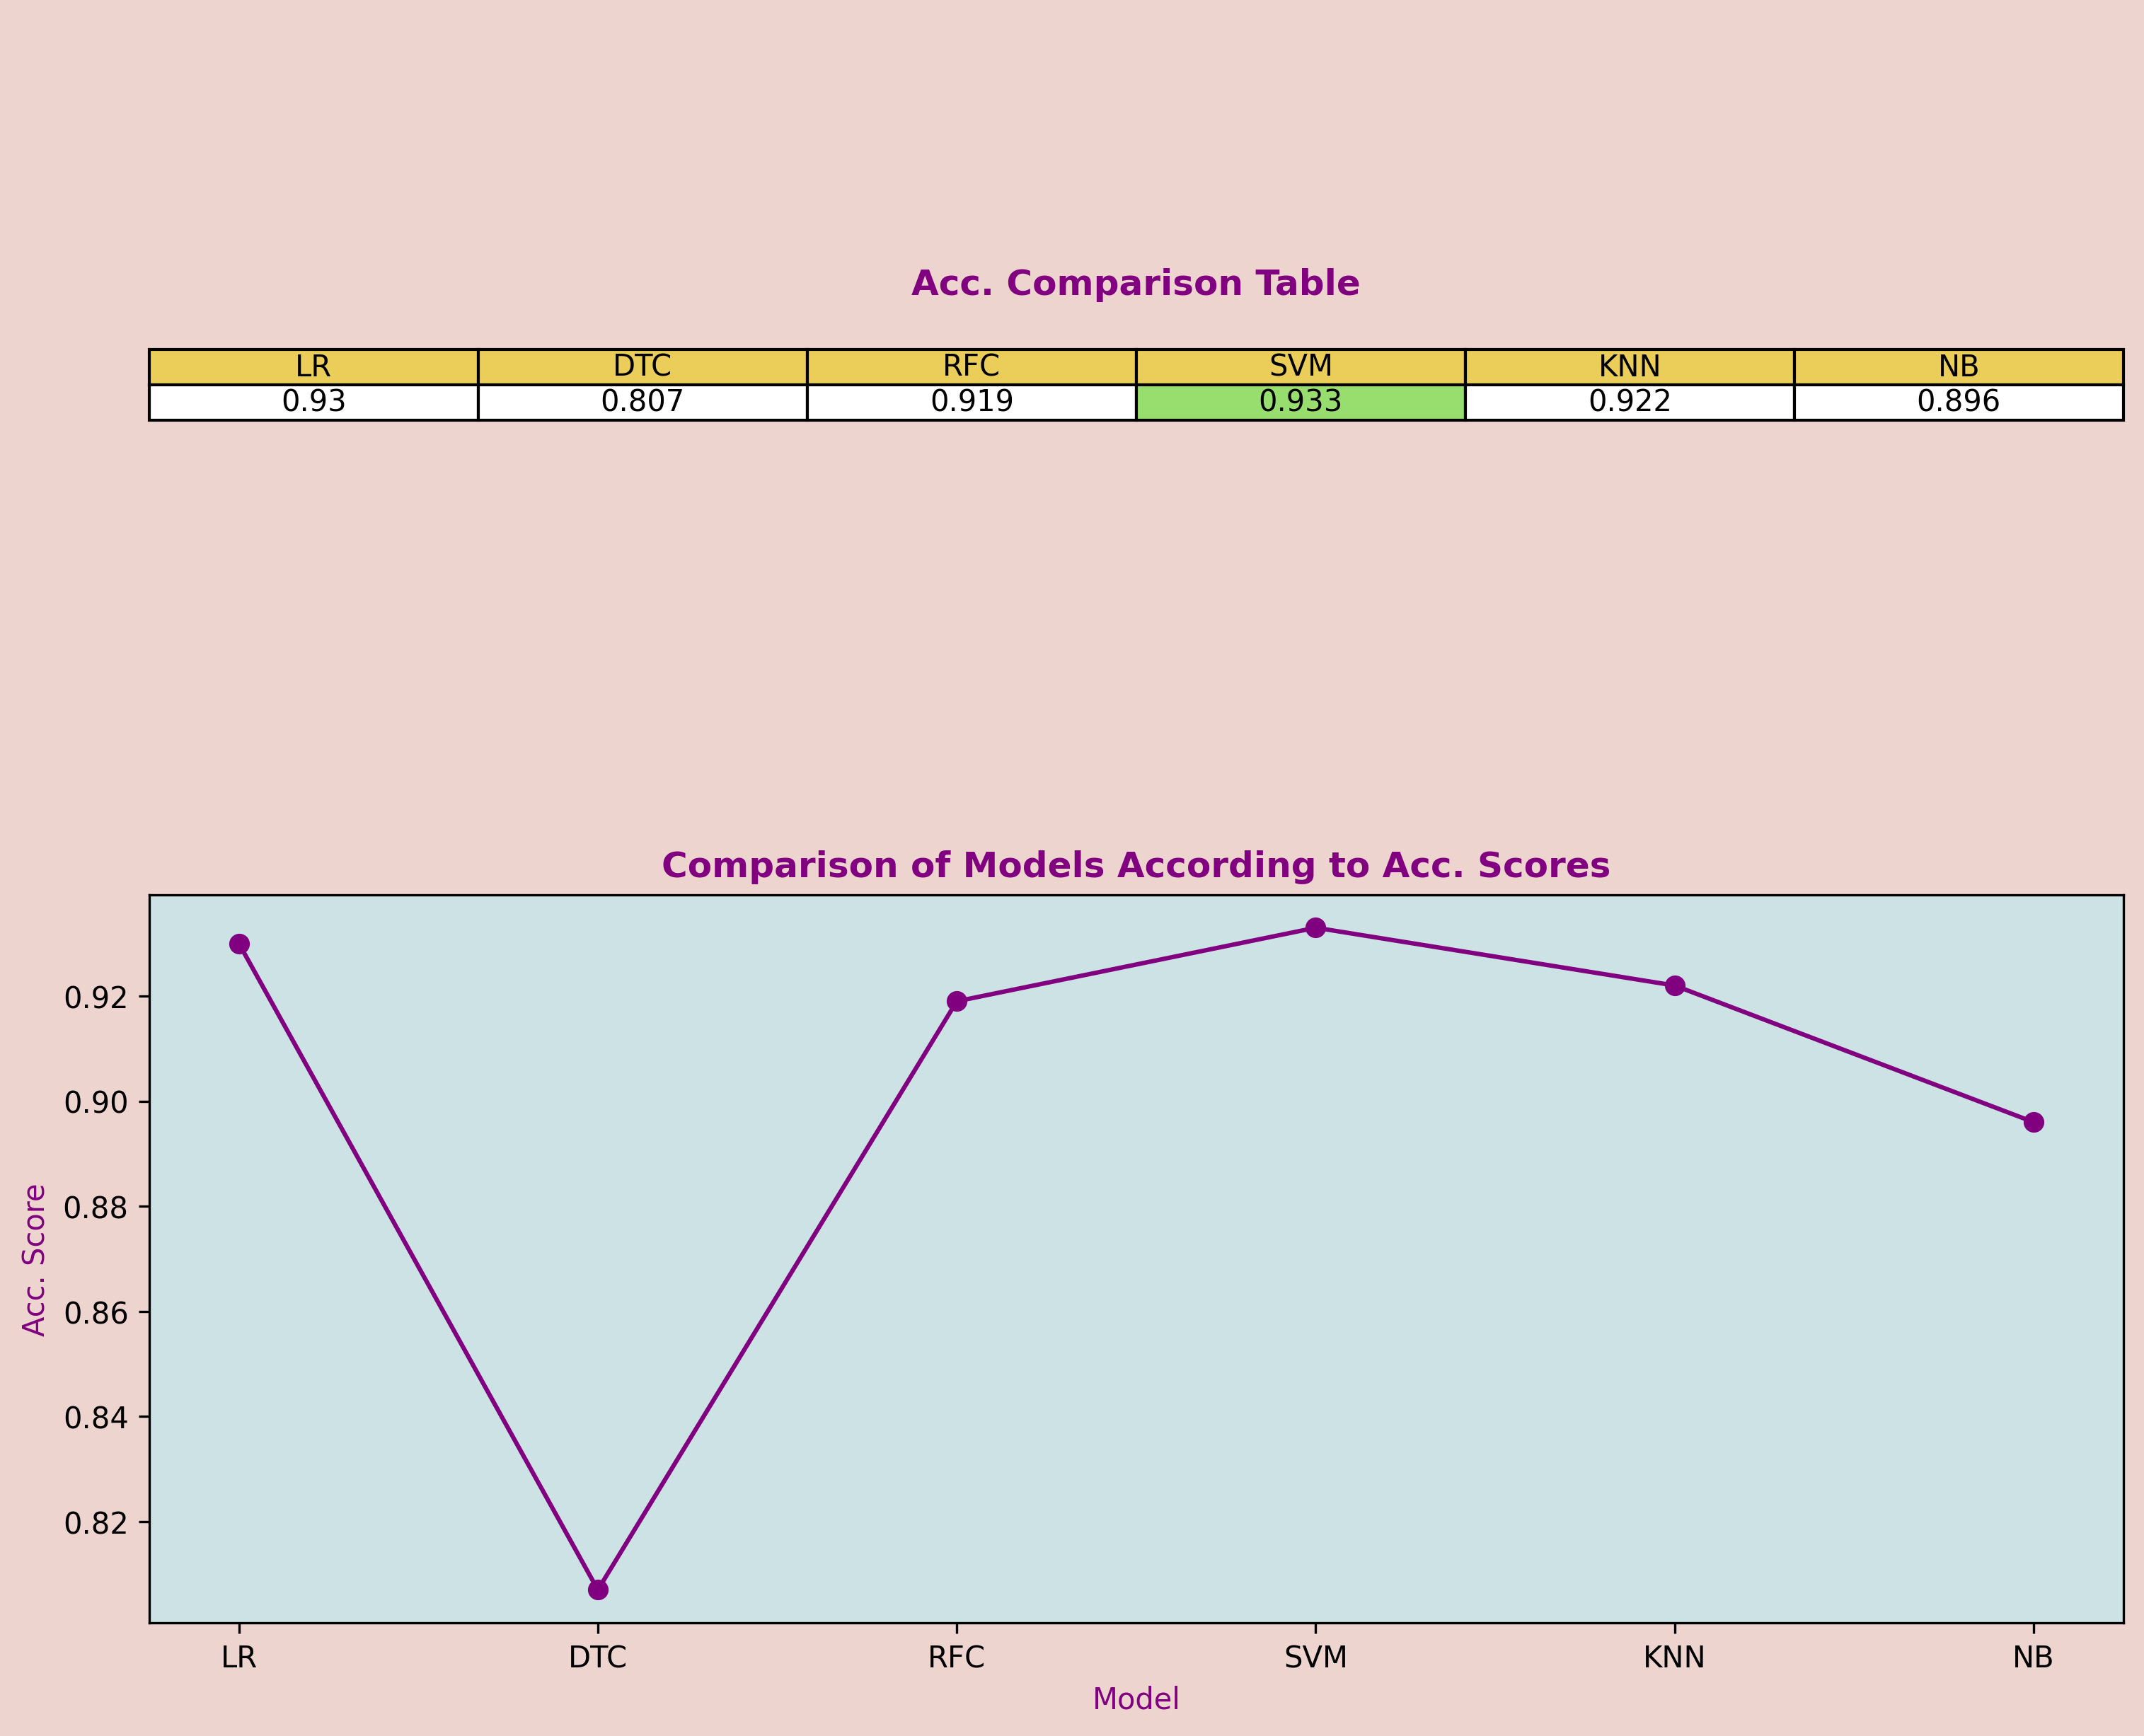

In [18]:
models.accuracy_scores()

<h2 style="color:crimson">Confusion Matrix</h2>

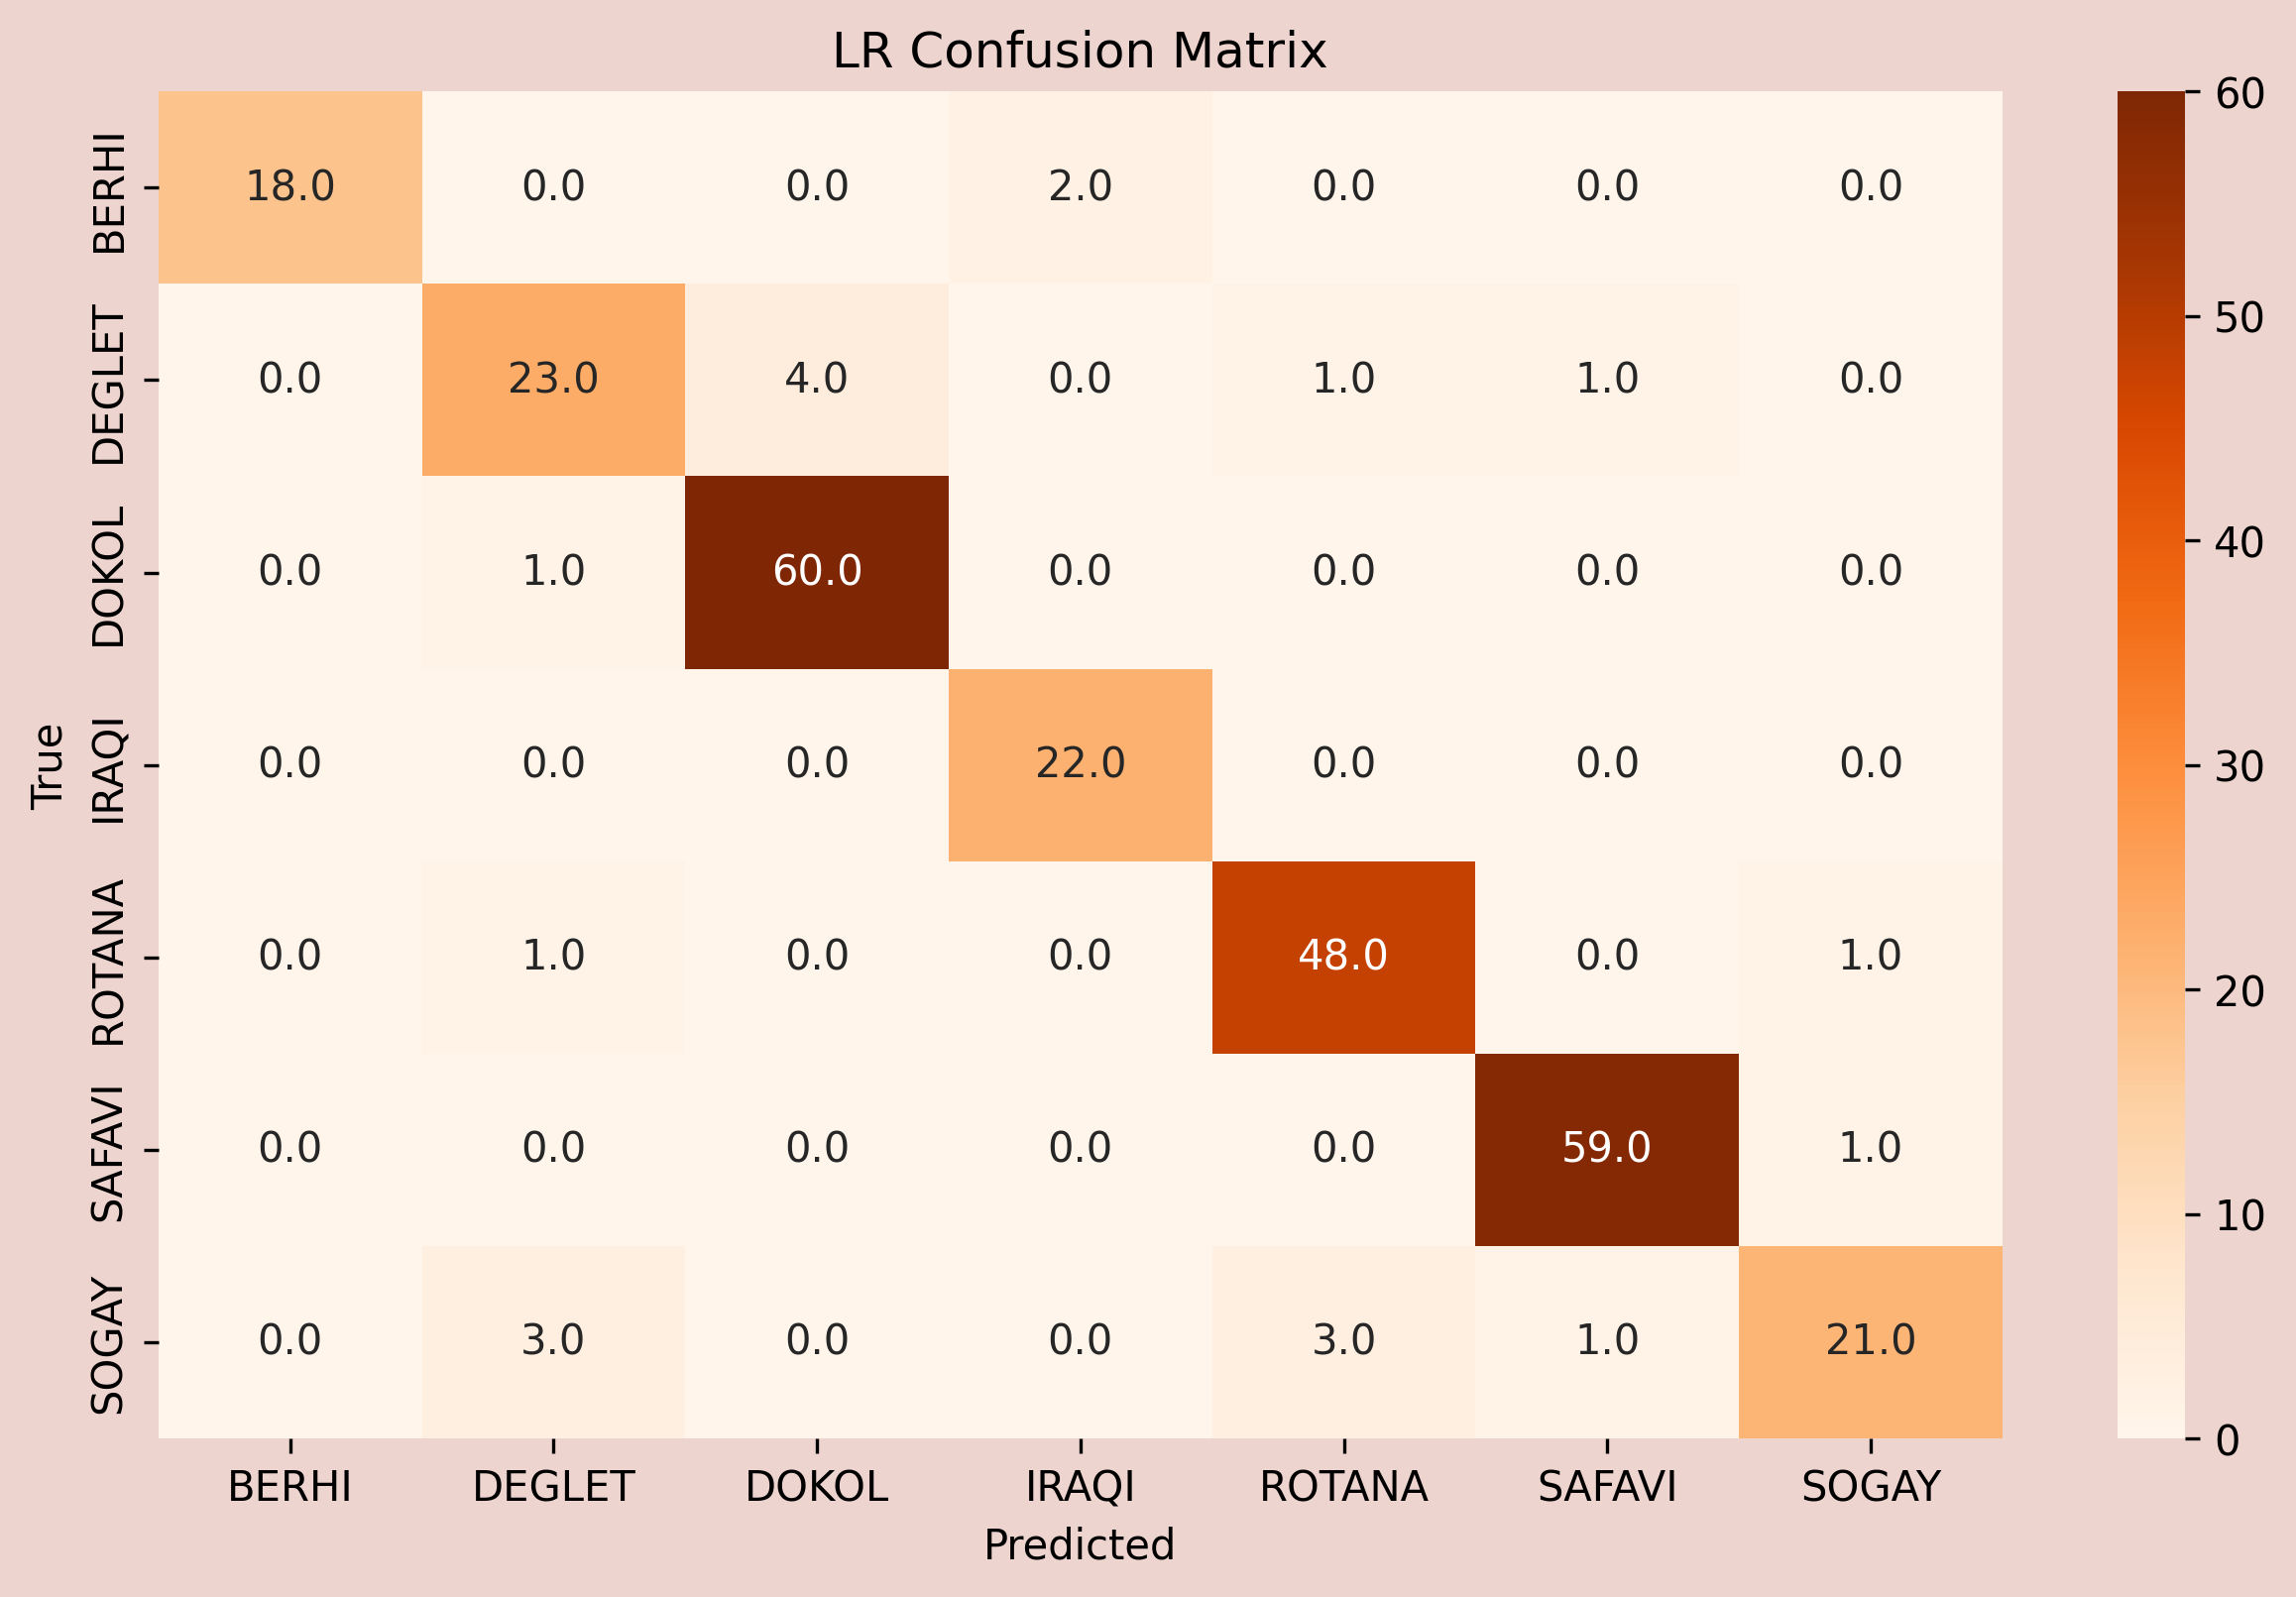

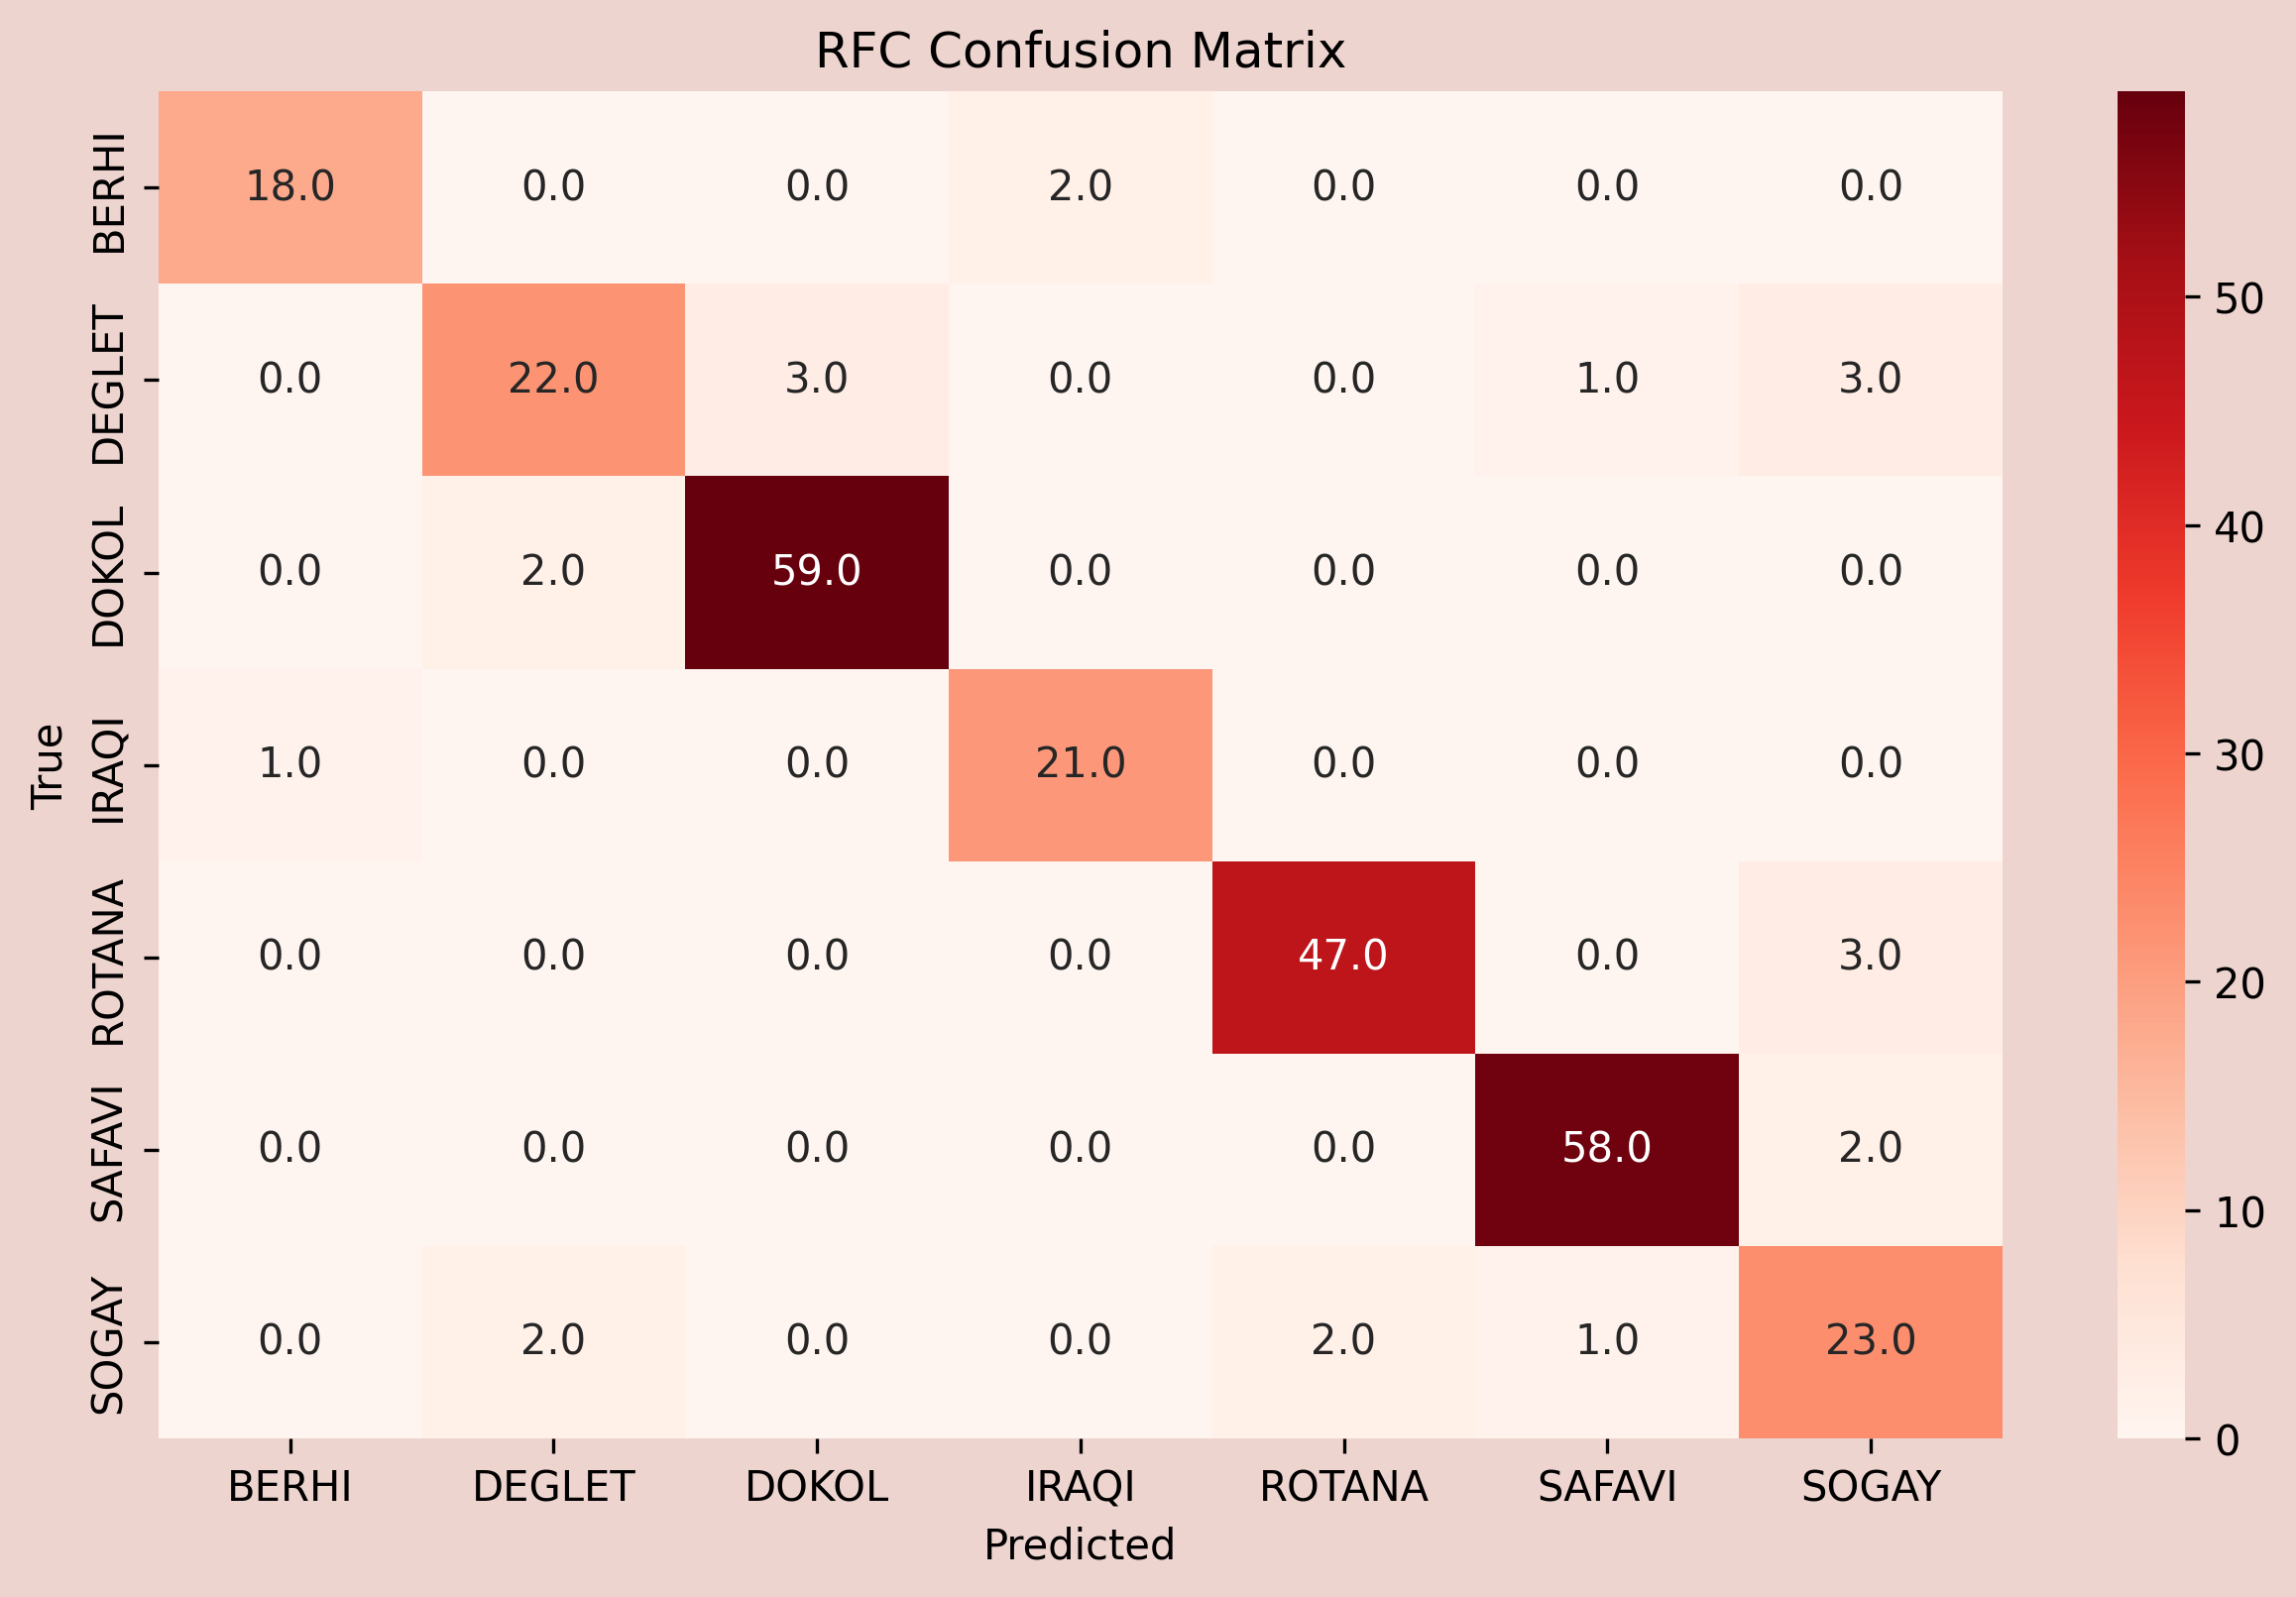

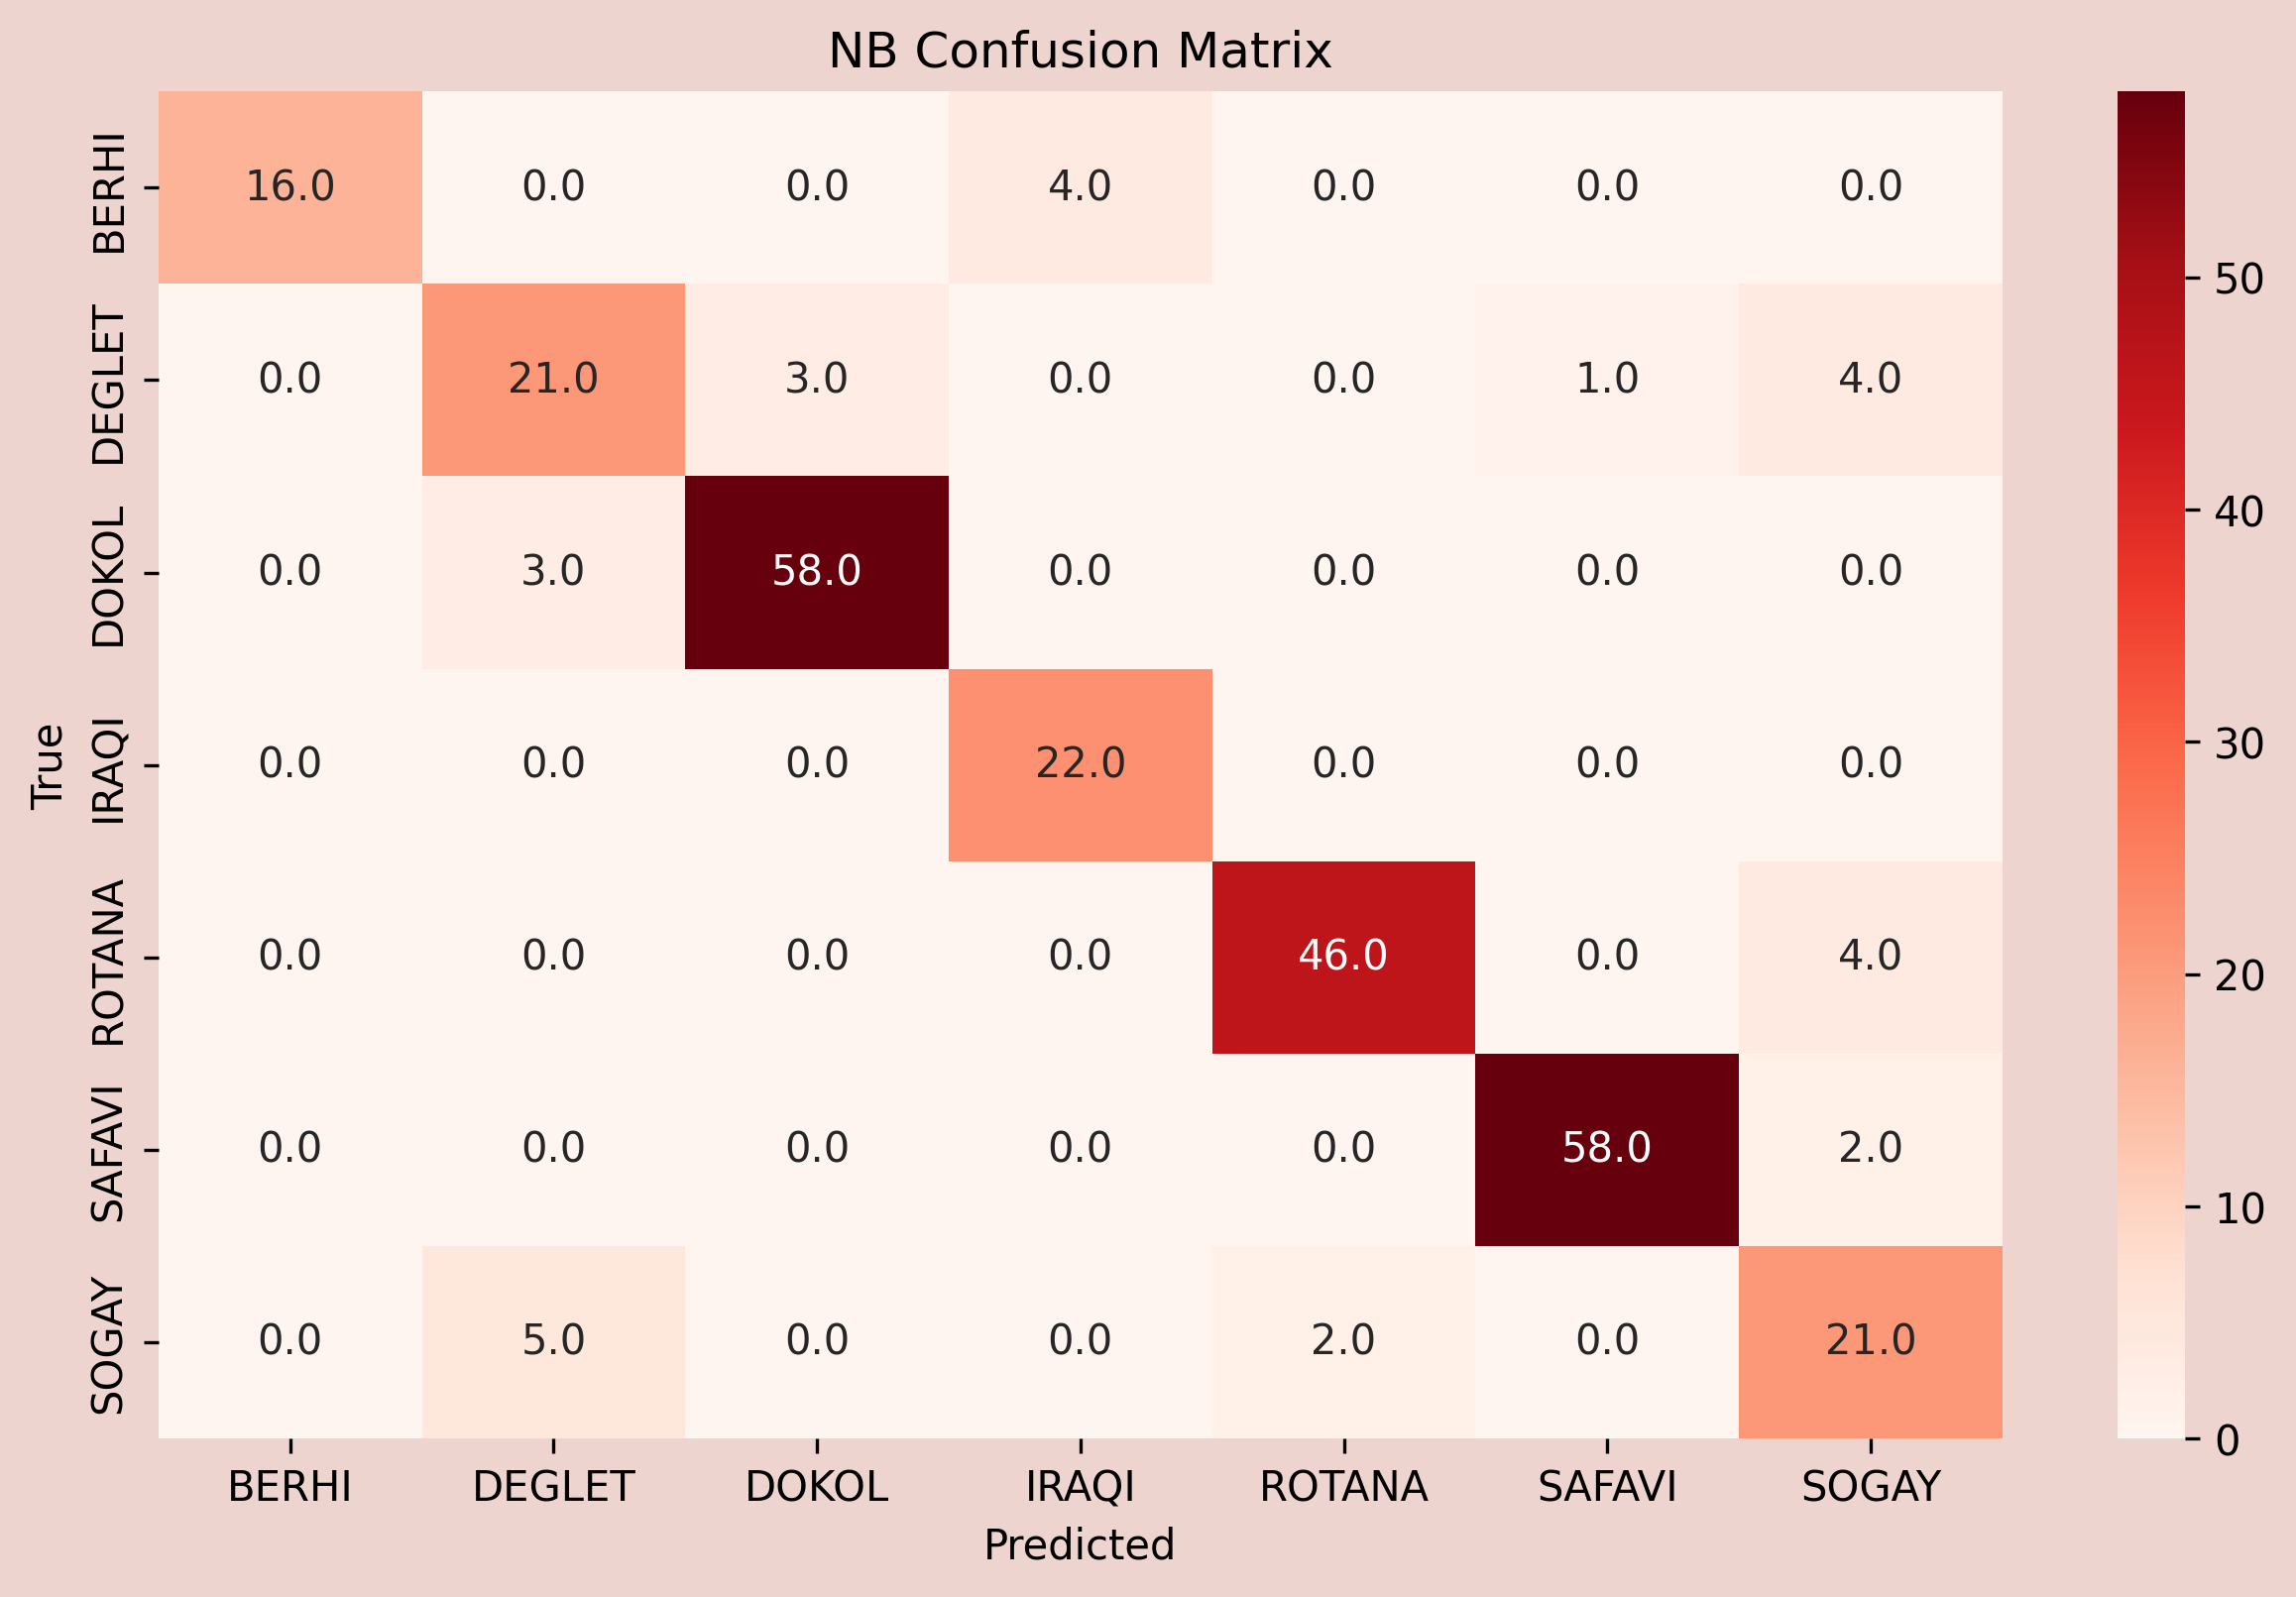

In [19]:
models.con_matrix()

<h2 style="color:crimson">Classification Reports</h2>

In [20]:
models.classification_reports()

LR

              precision    recall  f1-score   support

       BERHI       1.00      0.90      0.95        20
      DEGLET       0.82      0.79      0.81        29
       DOKOL       0.94      0.98      0.96        61
       IRAQI       0.92      1.00      0.96        22
      ROTANA       0.92      0.96      0.94        50
      SAFAVI       0.97      0.98      0.98        60
       SOGAY       0.91      0.75      0.82        28

    accuracy                           0.93       270
   macro avg       0.93      0.91      0.92       270
weighted avg       0.93      0.93      0.93       270

*****************************************************

DTC

              precision    recall  f1-score   support

       BERHI       0.81      0.65      0.72        20
      DEGLET       0.53      0.66      0.58        29
       DOKOL       0.92      0.89      0.90        61
       IRAQI       0.59      0.73      0.65        22
      ROTANA       0.93      0.84      0.88        50
      SAFAVI  

<h2 style="color:crimson">CV Scores</h2>

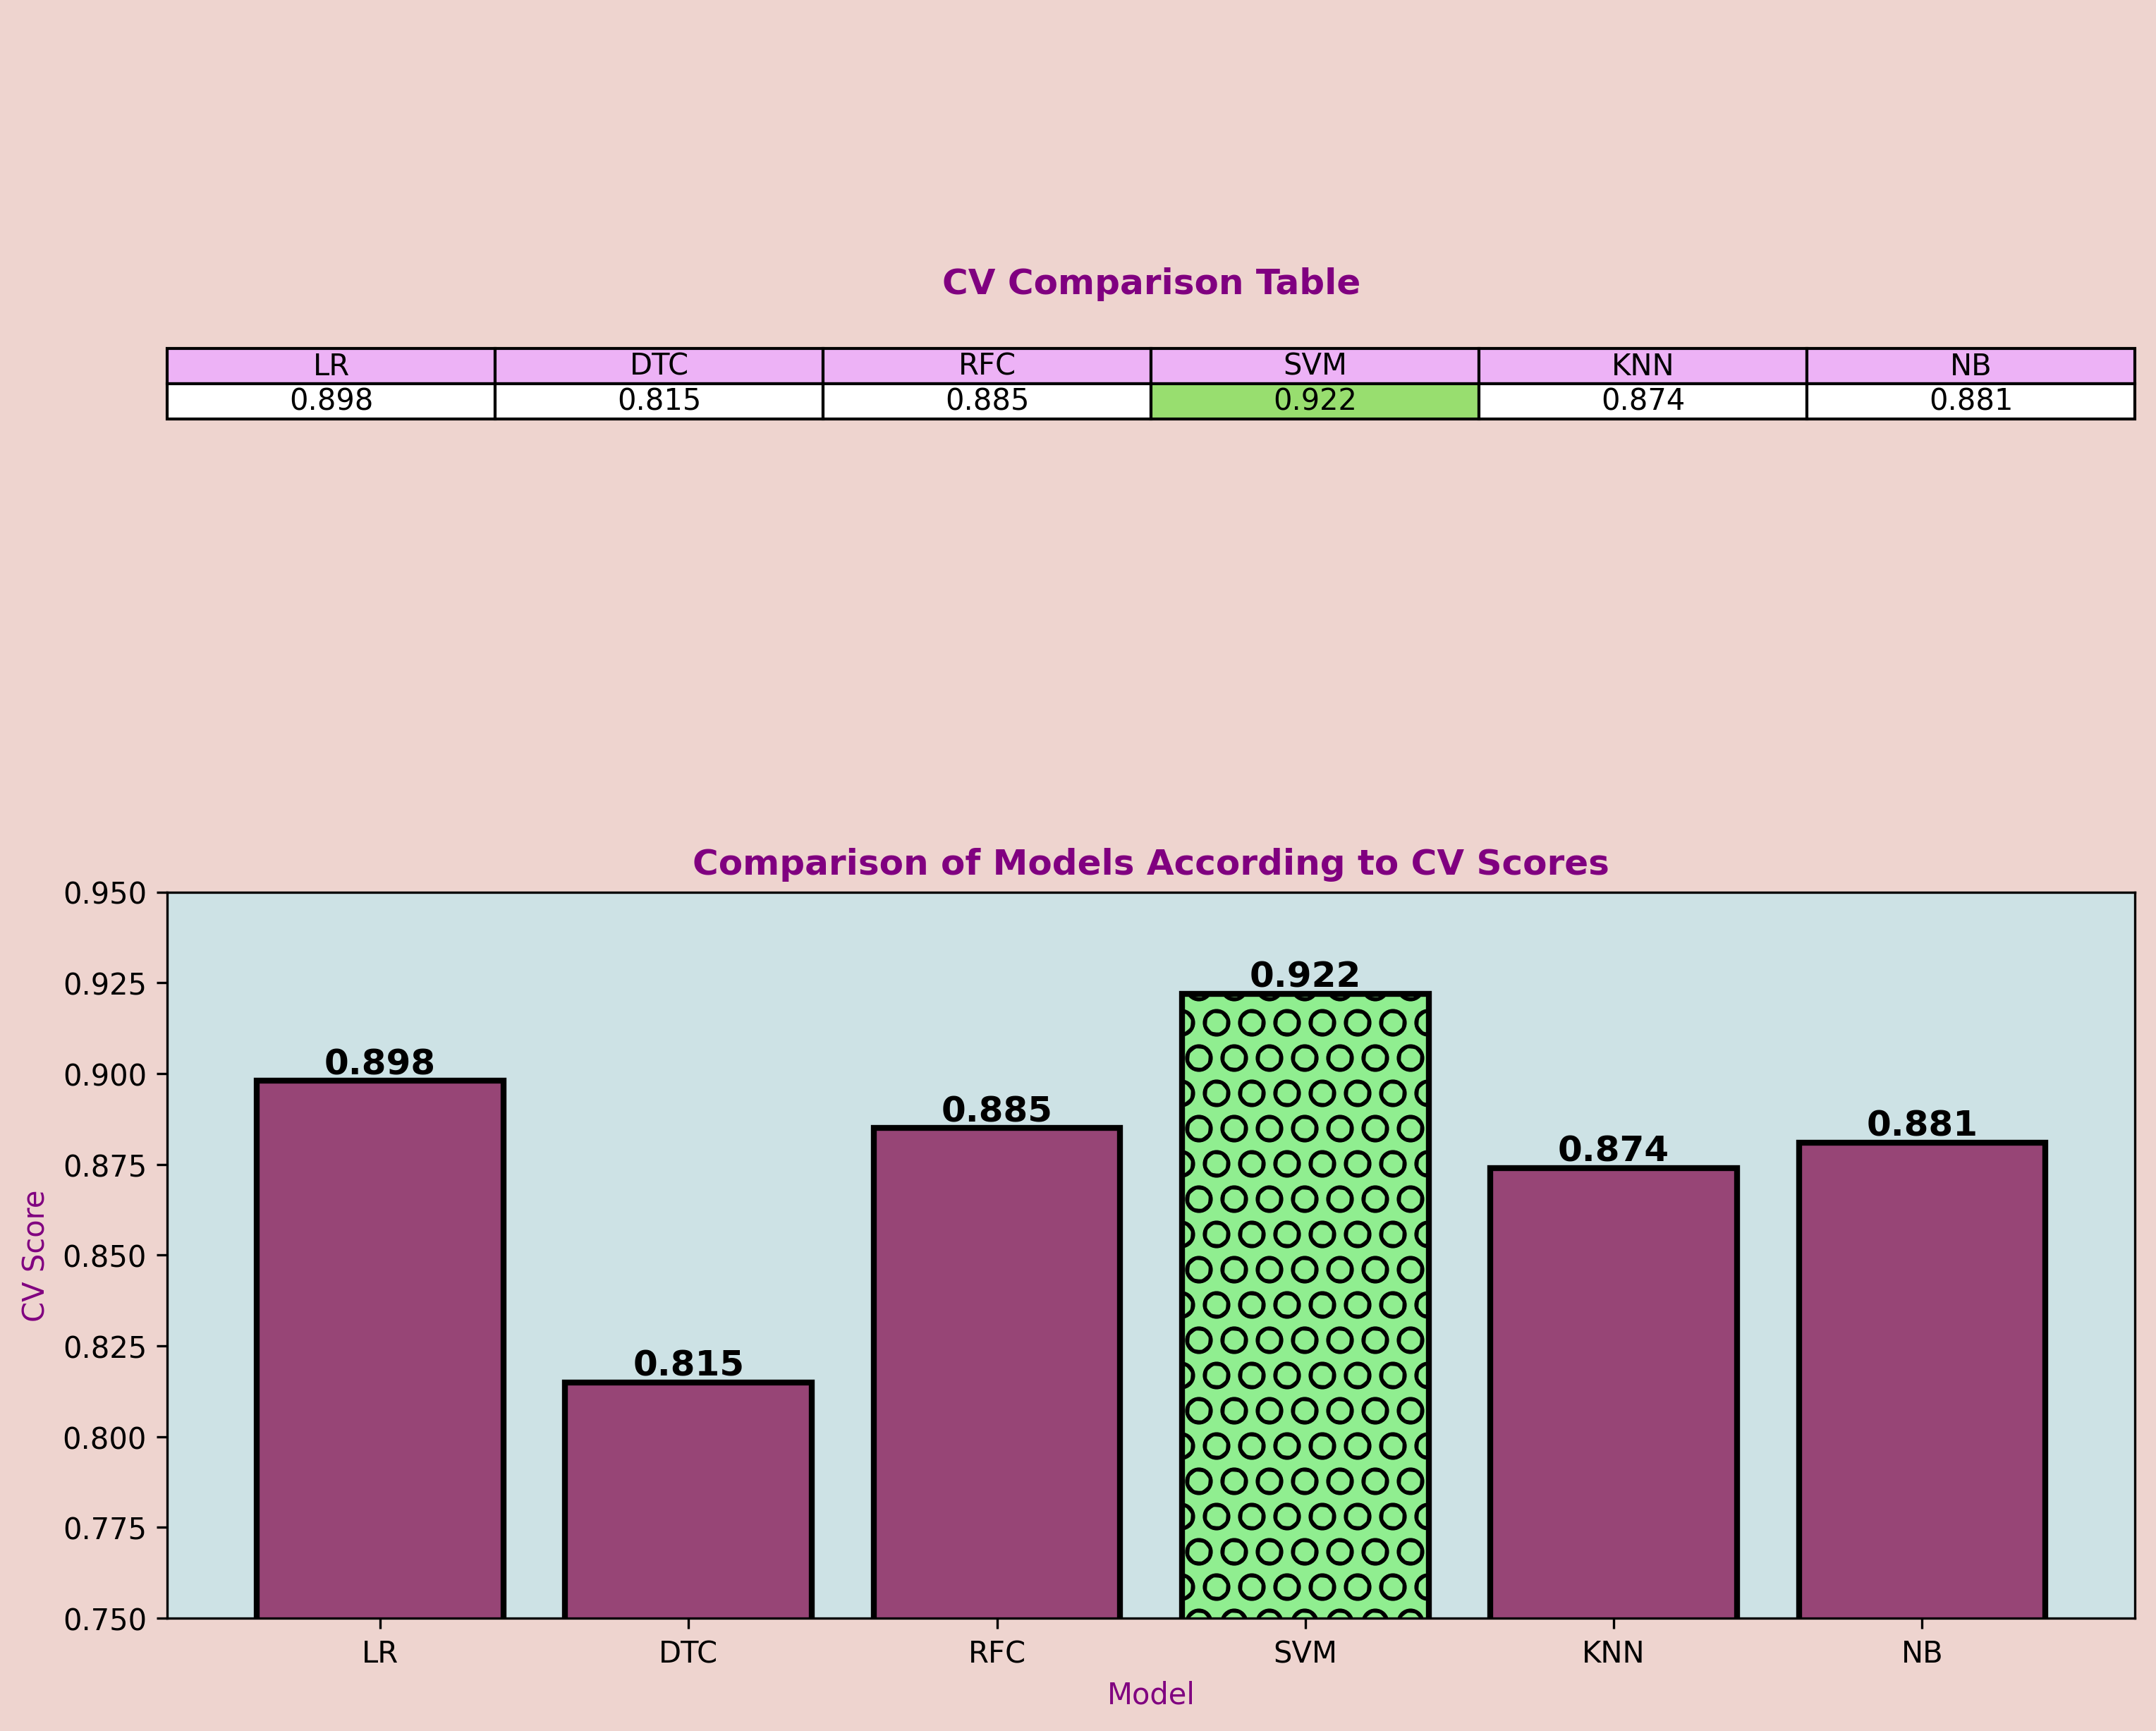

In [21]:
models.cross_validations()

<h3 style="color:tomato">I hope you enjoyed it. I will try to make updates when I have time.</h3>
<h3 style="color:tomato">Please upvote if you like it. Any feedbacks are welcome. Thank you in advance!</h3>